In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from my_module import * 
import warnings
warnings.filterwarnings("ignore")

## Data comprehension

In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df.columns, df.dtypes

(Index(['_id', 'awards.nominations', 'awards.text', 'awards.wins', 'cast',
        'countries', 'directors', 'fullplot', 'genres', 'imdb.id',
        'imdb.rating', 'imdb.votes', 'languages', 'lastupdated',
        'num_mflix_comments', 'plot', 'poster', 'rated', 'released', 'runtime',
        'title', 'tomatoes.consensus', 'tomatoes.critic', 'tomatoes.dvd',
        'tomatoes.fresh', 'tomatoes.lastUpdated', 'tomatoes.production',
        'tomatoes.rotten', 'tomatoes.viewer', 'tomatoes.website', 'type',
        'writers', 'year'],
       dtype='object'),
 _id                      object
 awards.nominations        int64
 awards.text              object
 awards.wins               int64
 cast                     object
 countries                object
 directors                object
 fullplot                 object
 genres                   object
 imdb.id                   int64
 imdb.rating             float64
 imdb.votes              float64
 languages                object
 lastupdate

In [4]:
df.describe()

,awards.nominations,awards.wins,imdb.id,imdb.rating,imdb.votes,num_mflix_comments,runtime,tomatoes.critic,tomatoes.fresh,tomatoes.rotten,tomatoes.viewer
count,23530.000000,23530.000000,2.353000e+04,23469.000000,2.346800e+04,23530.000000,23083.000000,0.0,12014.000000,12014.000000,0.0
mean,4.776286,4.111347,7.996709e+05,6.693404,2.040204e+04,1.745814,103.788112,NaN,33.281338,18.333694,NaN
std,10.145330,9.273129,9.713415e+05,0.975106,6.630484e+04,13.553440,34.630916,NaN,41.285091,27.001184,NaN
min,0.000000,0.000000,5.000000e+00,1.600000,5.000000e+00,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,1.000000,0.000000,9.980250e+04,6.200000,5.537500e+02,0.000000,90.000000,NaN,7.000000,2.000000,NaN
50%,2.000000,2.000000,3.189925e+05,6.800000,1.989500e+03,0.000000,100.000000,NaN,17.000000,7.000000,NaN
75%,5.000000,4.000000,1.316539e+06,7.300000,9.197500e+03,1.000000,113.000000,NaN,42.000000,21.000000,NaN
max,256.000000,267.000000,4.881276e+06,9.600000,1.521105e+06,161.000000,1256.000000,NaN,312.000000,195.000000,NaN


In [5]:
# Findding nulls in the CSV.
df.isnull().sum()


_id                         0
awards.nominations          0
awards.text                 0
awards.wins                 0
cast                      390
countries                  10
directors                 265
fullplot                 1542
genres                    116
imdb.id                     0
imdb.rating                61
imdb.votes                 62
languages                 260
lastupdated                 0
num_mflix_comments          0
plot                     1166
poster                   3387
rated                    9894
released                  504
runtime                   447
title                       0
tomatoes.consensus      18376
tomatoes.critic         23530
tomatoes.dvd             8524
tomatoes.fresh          11516
tomatoes.lastUpdated     2951
tomatoes.production      9050
tomatoes.rotten         11516
tomatoes.viewer         23530
tomatoes.website        16279
type                        0
writers                  1265
year                        0
dtype: int

In [6]:
df[["awards.text"]].describe()

,awards.text
count,23530
unique,2900
top,1 nomination.
freq,3157


In [7]:
# Deleting columns that do not bring values to the project 
"""
    Reason : 
        imdb.id = Unique value of each movies statisticaly incorrect
        tomatoes.critic = Empty column
        tomatoes.website = Movies website 
        tomatoes.viewer = Empry column
        tomatoes.lastUpdated = Movies update brings no value
        tomatoes.dvd = Mention is movies is released in Dvd bring no value 
        release = Wrong datetime format
        _id =  Unique ID of each movies 
        type = All movies are refered to 'movie'
        
"""
df = df.drop(['imdb.id','awards.text',  'tomatoes.critic', 'tomatoes.website','tomatoes.viewer',  '_id','type', 'tomatoes.dvd','tomatoes.lastUpdated', 'released', 'lastupdated', 'poster' ], axis=1)


In [8]:
# Checks the duplicated , None found
dups = df.duplicated()
dups.value_counts       

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
23525    False
23526    False
23527    False
23528    False
23529    False
Length: 23530, dtype: bool>

In [9]:
# Check all the the non numerical columns to identify wrong  data
numeric = df.applymap(lambda x: isinstance(x, (int, float)))
df[~numeric]

,awards.nominations,awards.wins,cast,countries,directors,fullplot,genres,imdb.rating,imdb.votes,languages,...,plot,rated,runtime,title,tomatoes.consensus,tomatoes.fresh,tomatoes.production,tomatoes.rotten,writers,year
0,NaN,NaN,"[""Charles Kayser"",""John Ott""]","[""USA""]","[""William K.L. Dickson""]",A stationary camera looks at a large anvil wit...,"[""Short""]",NaN,NaN,NaN,...,Three men hammer on an anvil and pass a bottle...,UNRATED,NaN,Blacksmith Scene,NaN,NaN,NaN,NaN,NaN,1893
1,NaN,NaN,"[""A.C. Abadie"",""Gilbert M. 'Broncho Billy' And...","[""USA""]","[""Edwin S. Porter""]",Among the earliest existing films in American ...,"[""Short"",""Western""]",NaN,NaN,"[""English""]",...,A group of bandits stage a brazen train hold-u...,TV-G,NaN,The Great Train Robbery,NaN,NaN,NaN,NaN,NaN,1903
2,NaN,NaN,"[""Martin Fuller"",""Mrs. William Bechtel"",""Walte...","[""USA""]","[""Harold M. Shaw""]","Thanks to the Fresh Air Fund, a slum child esc...","[""Short"",""Drama"",""Fantasy""]",NaN,NaN,"[""English""]",...,"A young boy, opressed by his mother, goes on a...",UNRATED,NaN,The Land Beyond the Sunset,NaN,NaN,NaN,NaN,"[""Dorothy G. Shore""]",1912
3,NaN,NaN,"[""Frank Powell"",""Grace Henderson"",""James Kirkw...","[""USA""]","[""D.W. Griffith""]","A greedy tycoon decides, on a whim, to corner ...","[""Short"",""Drama""]",NaN,NaN,"[""English""]",...,"A greedy tycoon decides, on a whim, to corner ...",G,NaN,A Corner in Wheat,NaN,NaN,NaN,NaN,NaN,1909
4,NaN,NaN,"[""Winsor McCay""]","[""USA""]","[""Winsor McCay"",""J. Stuart Blackton""]",Cartoonist Winsor McCay agrees to create a lar...,"[""Animation"",""Short"",""Comedy""]",NaN,NaN,"[""English""]",...,"Cartoon figures announce, via comic strip ball...",NaN,NaN,"Winsor McCay, the Famous Cartoonist of the N.Y...",NaN,NaN,NaN,NaN,"[""Winsor McCay (comic strip \""Little Nemo in S...",1911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23525,NaN,NaN,"[""Hsiao-chuan Chang"",""Qian Wan"",""Tang Sui"",""Ya...","[""Taiwan""]","[""Chung Lee""]",A-Gu enlists a group of contract killers in th...,"[""Comedy""]",NaN,NaN,"[""Mandarin""]",...,A-Gu enlists a group of contract killers in th...,NaN,NaN,The Laundryman,NaN,NaN,NaN,NaN,NaN,2015
23526,NaN,NaN,"[""Filip Plawiak"",""Adam Woronowicz"",""Julia Kijo...","[""Poland"",""Czech Republic"",""Slovakia""]","[""Marcin Koszalka""]","Karol, an ordinary young man, runs into a much...","[""Thriller""]",NaN,NaN,"[""Polish"",""English""]",...,"Karol, an ordinary young man, runs into a much...",NaN,NaN,The Red Spider,NaN,NaN,NaN,NaN,"[""Marcin Koszalka"",""Lukasz M. Maciejewski"",""Ma...",2015
23527,NaN,NaN,"[""Maxim Gaudette"",""Karelle Tremblay"",""Valerie ...","[""Canada""]","[""Anne èmond""]",Guy's tragic death is a shock for the Leblanc ...,"[""Drama""]",NaN,NaN,"[""French""]",...,Guy's tragic death is a shock for the Leblanc ...,NaN,NaN,Our Loved Ones,NaN,NaN,NaN,NaN,"[""Anne èmond""]",2015
23528,NaN,NaN,"[""Chantal Akerman""]","[""Belgium"",""France""]","[""Chantal Akerman""]",NaN,"[""Documentary""]",NaN,NaN,"[""French""]",...,NaN,NaN,NaN,No Home Movie,NaN,NaN,NaN,NaN,"[""Chantal Akerman""]",2015


### df['imdb.rating'].isnull().sum() delete 61 **Done**
### df['imdb.votes'].isnull().sum() to delete 62 **Done**
### df['runtime'].isnull().sum()  = 447 to find a way to replace those value by mean,std... *Outliers--removed using lower and upper bounds | Nan filled with std** **Done**
### df["tomatoes.consensus"].isnull().sum() = 18880 replace Nan by 0 and strings by 1 **Done**
### df["lastupdated"] = To drop has informations does not bring any values **Done**
### df["tomatoes.dvd"].isnull().sum() = To drop because this date_time does not bring value **Done**
### df["tomatoes.lastUpdated"] = To drop because the last time the movies was update does not bring value **Done**
### df["released"] =  To drop because column "year" contain the released year in proper format **Done**
### df["tomatoes.fresh"].isnull().sum() | df["tomatoes.rotten"].isnull().sum() = Replace Nan by 0 **Done**
### df["tomatoes.production"].isnull().sum() =  9000 replace Nan by 0 and strings by 1 **Done**
### df["writers"].isnull().sum() =  1500 to replace by "Unknow" has we do not know the writers **Done**
"""
df["writers"].isnull().sum()
df[df["writers"].notna()]
"""

Cleaning numerical column


In [10]:
df = df.dropna(subset=["imdb.rating", "imdb.votes", "plot"])
df["runtime"].fillna(value=100, inplace=True)
df["tomatoes.consensus"] = df["tomatoes.consensus"].apply(replace_values)
df["tomatoes.fresh"].fillna(value=0, inplace=True)
df["tomatoes.rotten"].fillna(value=0, inplace=True)
df["tomatoes.production"] = df["tomatoes.consensus"].apply(replace_values)
df["writers"].fillna(value="unknown", inplace=True)
#df["awards.nominations"].fillna(value=0, inplace=True)
#df["awards.wins"].fillna(value=0, inplace=True)


In [11]:
# Verify and apply the function "replace_values"
count = df['tomatoes.consensus'].value_counts(normalize=True)
print(count)

0    0.769972
1    0.230028
Name: tomatoes.consensus, dtype: float64


In [12]:
## Removing outliers in "runtime" column 

df = find_and_remove_outliers(df,'runtime')


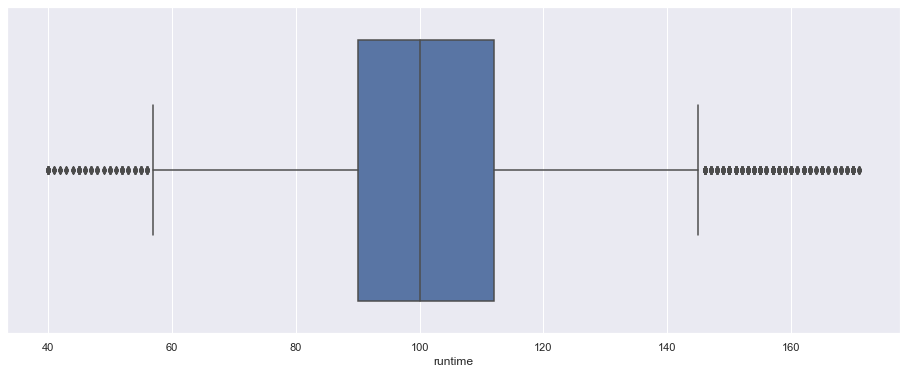

In [13]:
sns.set(rc={'figure.figsize':(16,6)})
sns.boxplot(data=df, x='runtime')
plt.show()

<AxesSubplot:xlabel='runtime'>

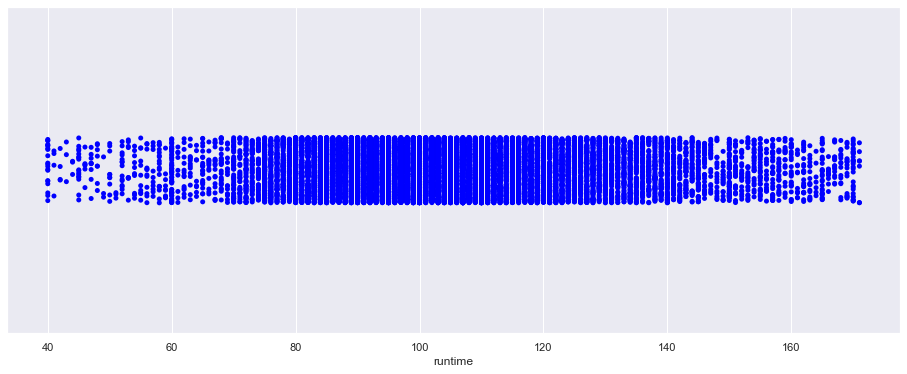

In [14]:
sns.stripplot(df['runtime'], color='blue', jitter=True)


In [15]:
# Converting in "int" numerical columns
# Cleaning year column to keep only numerical values and extract only the years 
df['year'] = df['year'].str.extract('(\d+)')
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.year

### Alphanumerical columns cleaning 

In [16]:
df[~numeric].head()

,awards.nominations,awards.wins,cast,countries,directors,fullplot,genres,imdb.rating,imdb.votes,languages,...,plot,rated,runtime,title,tomatoes.consensus,tomatoes.fresh,tomatoes.production,tomatoes.rotten,writers,year
5,NaN,NaN,"[""Jane Gail"",""Ethel Grandin"",""William H. Turne...","[""USA""]","[""George Loane Tucker""]",NaN,"[""Crime"",""Drama""]",NaN,NaN,"[""English""]",...,"A woman, with the aid of her police officer sw...",TV-PG,NaN,Traffic in Souls,NaN,NaN,NaN,NaN,NaN,1913
7,NaN,NaN,"[""Stanley Hunt"",""Sarah Constance Smith Hunt"",""...","[""USA""]","[""Edward S. Curtis""]",NaN,"[""Drama"",""History""]",NaN,NaN,"[""English""]",...,Original advertising for the film describes it...,NaN,NaN,In the Land of the Head Hunters,NaN,NaN,0.0,NaN,"[""Edward S. Curtis (story)""]",1914
9,NaN,NaN,"[""Lillian Gish"",""Mae Marsh"",""Henry B. Walthall...","[""USA""]","[""D.W. Griffith""]","Two brothers, Phil and Ted Stoneman, visit the...","[""Drama"",""History"",""Romance""]",NaN,NaN,NaN,...,The Civil War divides friends and destroys fam...,NOT RATED,NaN,The Birth of a Nation,1.0,NaN,1.0,NaN,"[""Thomas Dixon Jr. (adapted from his novel: \""...",1915
10,NaN,NaN,"[""Fannie Ward"",""Sessue Hayakawa"",""Jack Dean"",""...","[""USA""]","[""Cecil B. DeMille""]",Edith Hardy uses charity funds for Wall Street...,"[""Drama""]",NaN,NaN,"[""English""]",...,"A venal, spoiled stockbroker's wife impulsivel...",NOT RATED,NaN,The Cheat,NaN,NaN,0.0,NaN,"[""Hector Turnbull (scenario)"",""Jeanie Macphers...",1915
11,NaN,NaN,"[""George Beban"",""Clara Williams"",""J. Frank Bur...","[""USA""]","[""Reginald Barker""]",An immigrant leaves his sweetheart in Italy to...,"[""Drama""]",NaN,NaN,"[""English""]",...,An immigrant leaves his sweetheart in Italy to...,PASSED,NaN,The Italian,NaN,NaN,NaN,NaN,"[""Thomas H. Ince (story)"",""C. Gardner Sullivan...",1915


In [17]:
# Removing special characters to all strings columns

spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+","-",".","/",":",";","<", "=",">","?","@","[","\\","]","^","_", "`","{","|","}","~","–", "," ]
for char in spec_chars:
    df['cast'] = df['cast'].str.replace(char, ' ')
    df["countries"] = df["countries"].str.replace(char, ' ')
    df["directors"] = df["directors"].str.replace(char, ' ')
    df["fullplot"] = df["fullplot"].str.replace(char, ' ')
    df["genres"] = df["genres"].str.replace(char, ' ')
    df["languages"] = df["languages"].str.replace(char, ' ')
    df["title"] = df["title"].str.replace(char, ' ')
    df["writers"] = df["writers"].str.replace(char, ' ')
    df["rated"] = df["rated"].str.replace(char, ' ')

In [18]:
# Apply the function to the "clean_names"
liste=['cast',"countries","directors","fullplot","genres","languages","title","writers","rated"]
for i in liste:
     df[i]=df[i].apply(clean_names)
    

# df['cast'] = df['cast'].apply(clean_names)
# df["countries"] = df["countries"].apply(clean_names)
# df["directors"] = df["directors"].apply(clean_names)
# df["fullplot"] = df["fullplot"].apply(clean_names)
# df["genres"] = df["genres"].apply(clean_names)
# df["languages"] = df["languages"].apply(clean_names)
# df["title"] = df["title"].apply(clean_names)
# df["writers"] = df["writers"].apply(clean_names)
# df["rated"] = df["rated"].apply(clean_names)


In [19]:
df['cast'] = df['cast'].str.replace("madam", ' ')
df['cast'] = df['cast'].str.replace("sir", ' ')
df['cast'] = df['cast'].str.replace("ms", ' ')



In [20]:
# find the occurrences of "Mr" and "Mme" in the dataset
mr_occurrences = df[df["cast"].str.find("ms") != -1]
#mme_occurrences = df[[df.str.find("Mme") != -1]]

# check the number of occurrences
print("Number of occurrences of Mr:", len(mr_occurrences))

Number of occurrences of Mr: 0


In [21]:
# Identify rated column values 
unique_values = df['rated'].value_counts()
unique_values

unknown      8131
r            5468
pg 13        2280
pg           1826
not rated    1293
unrated       694
approved      684
g             433
passed        175
tv 14          70
tv pg          62
tv g           52
tv ma          51
gp             41
m              37
x              37
nc 17          37
ao              3
tv y7           3
open            1
Name: rated, dtype: int64

### Typo
unkonw = No ranking\
R = Restricted (-17 accompagnés d'un adulte)\
PG-13 = Parents Strongly Cautioned\
PG = Parental Guidance Suggested\
G = General Audiences\
NOT RATED = No ranking\
UNRATED = No ranking\
APPROVED = Trailer of the movie approved\
GP = General Audiences\
X = Porn\
NC-17 = Like R "No one under 17"\
M = Mature audiences 16 years and over\
AO = Adult Only\
TV-Y7 = General audiences\
Open = To drop\
Not rated = Move to NOT RATED\
Passed = 13 and overs

Tv show
open     
tv 14         
tv pg         
tv g           
tv ma
tv y7          

**Grouping**\
NOT RATED = unknown  + UNRATED + passed  \
R = NC-17 + M + AO\
PG = PG + PG-13 + tv 14 + tv pg + tv ma \
G = G + GP + tv g + tv y7 \ 

In [22]:
# Dropping not relevant groups 
df = df[df["rated"].str.contains("open") == False]

In [23]:
# Grouping ratings 
df = df.replace({
    'unknown' :  'not rated' , 'unrated': 'not rated','unrated': 'passed',
    'nc 17' :  'r' , 'm': 'r','ao': 'r',
    'pg 13' :  'pg' , 'tv 14': 'pg','tv pg': 'pg','tv ma' : 'pg', 'passed' : 'pg',
    'gp' :  'g' , 'tv g': 'g','tv y7': 'g'
    })
df["rated"].value_counts()

not rated    9424
r            5545
pg           4464
passed        694
approved      684
g             529
x              37
Name: rated, dtype: int64

In [30]:
df = df.drop_duplicates()

In [31]:
df.to_csv('movies_cleaned_str_int.csv', encoding='utf-8', index=True)